In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense
import seaborn as sns

# Specify the 'latin-1' encoding when reading the CSV file
df2023 = pd.read_csv("/content/2023.CSV", sep=';', skiprows=8, encoding='latin-1', usecols=range(19) )

# Exibir primeiras linhas do dataset
df2023

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
0,2023/01/01,0000 UTC,0,"946,8","946,8","946,1",NaN,"21,4","19,3","22,1","21,4","19,5",19,88,83,88,64,"3,1","1,8"
1,2023/01/01,0100 UTC,0,"947,2","947,3","946,8",NaN,"20,5","18,9","21,4","20,5","19,4","18,7",90,88,90,203,"2,9",",7"
2,2023/01/01,0200 UTC,0,"946,9","947,4","946,9",NaN,"20,9","19,2","20,9","20,4","19,2","18,9",91,89,90,203,"1,7",",1"
3,2023/01/01,0300 UTC,0,"946,3",947,"946,3",NaN,"19,8","18,6","21,1","19,8","19,3","18,4",93,88,93,183,",8",0
4,2023/01/01,0400 UTC,0,"945,5","946,3","945,5",NaN,"19,9","18,6",20,"19,6","18,9","18,5",94,92,92,115,"1,9",",9"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2023/12/31,1900 UTC,0,"943,9","944,3","943,9","2869,1","27,5","17,3","29,4","27,4","18,1","15,8",55,45,54,138,10,"5,8"
8756,2023/12/31,2000 UTC,0,"944,1","944,1","943,9","1812,9","26,3",17,"27,5","26,2","17,8","16,6",57,53,57,142,"8,8","4,5"
8757,2023/12/31,2100 UTC,0,"944,4","944,4","944,1","1079,6","24,6","16,8","26,6","24,6","17,3","16,6",62,56,62,133,"9,1","5,7"
8758,2023/12/31,2200 UTC,0,"944,9",945,"944,4","234,9","22,1","16,8","24,6","22,1",17,"16,5",72,62,72,163,10,"4,1"


In [ ]:
df2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 19 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Data                                                   8760 non-null   object
 1   Hora UTC                                               8760 non-null   object
 2   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       8759 non-null   object
 3   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  8760 non-null   object
 4   PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        8760 non-null   object
 5   PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       8760 non-null   object
 6   RADIACAO GLOBAL (Kj/m²)                                4717 non-null   object
 7   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)           8760 non-null   object
 8   TEMPERATURA DO PONTO DE ORVALHO (°C)                   876

In [ ]:
print(df2023.columns)

df2023 = df2023.drop(['RADIACAO GLOBAL (Kj/m²)', 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)', 'TEMPERATURA DO PONTO DE ORVALHO (°C)', 'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)','TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)', 'VENTO, DIREÇÃO HORARIA (gr) (° (gr))', 'VENTO, VELOCIDADE HORARIA (m/s)'], axis=1)

df2023

Index(['Data', 'Hora UTC', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
       'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
       'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
       'RADIACAO GLOBAL (Kj/m²)',
       'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
       'TEMPERATURA DO PONTO DE ORVALHO (°C)',
       'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)',
       'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
       'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
       'UMIDADE RELATIVA DO AR, HORARIA (%)',
       'VENTO, DIREÇÃO HORARIA (gr) (° (gr))', 'VENTO, RAJADA MAXIMA (m/s)',
       'VENTO, VELOCIDADE HORARIA (m/s)'],
      dtype='object')


,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, RAJADA MAXIMA (m/s)"
0,2023/01/01,0000 UTC,0,"946,8","946,8","946,1","22,1","21,4",88,83,88,"3,1"
1,2023/01/01,0100 UTC,0,"947,2","947,3","946,8","21,4","20,5",90,88,90,"2,9"
2,2023/01/01,0200 UTC,0,"946,9","947,4","946,9","20,9","20,4",91,89,90,"1,7"
3,2023/01/01,0300 UTC,0,"946,3",947,"946,3","21,1","19,8",93,88,93,",8"
4,2023/01/01,0400 UTC,0,"945,5","946,3","945,5",20,"19,6",94,92,92,"1,9"
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2023/12/31,1900 UTC,0,"943,9","944,3","943,9","29,4","27,4",55,45,54,10
8756,2023/12/31,2000 UTC,0,"944,1","944,1","943,9","27,5","26,2",57,53,57,"8,8"
8757,2023/12/31,2100 UTC,0,"944,4","944,4","944,1","26,6","24,6",62,56,62,"9,1"
8758,2023/12/31,2200 UTC,0,"944,9",945,"944,4","24,6","22,1",72,62,72,10


In [ ]:
df2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Data                                                   8760 non-null   object
 1   Hora UTC                                               8760 non-null   object
 2   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       8759 non-null   object
 3   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  8760 non-null   object
 4   PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        8760 non-null   object
 5   PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       8760 non-null   object
 6   TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)             8760 non-null   object
 7   TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)             8760 non-null   object
 8   UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)               876

In [ ]:
# Convertendo colunas numéricas para float
colunas_para_converter = [
    'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
    'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
    'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
    'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
    'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
    'VENTO, RAJADA MAXIMA (m/s)'
]

# Remover espaços em branco no início e fim das strings
df2023[colunas_para_converter] = df2023[colunas_para_converter].apply(lambda x: x.str.strip())

# Substituir vírgulas por pontos (caso haja)
df2023[colunas_para_converter] = df2023[colunas_para_converter].replace(',', '.', regex=True)

# Converter as colunas para float
df2023[colunas_para_converter] = df2023[colunas_para_converter].apply(pd.to_numeric, errors='coerce')

df2023


,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, RAJADA MAXIMA (m/s)"
0,2023/01/01,0000 UTC,0.0,946.8,946.8,946.1,22.1,21.4,88,83,88,3.1
1,2023/01/01,0100 UTC,0.0,947.2,947.3,946.8,21.4,20.5,90,88,90,2.9
2,2023/01/01,0200 UTC,0.0,946.9,947.4,946.9,20.9,20.4,91,89,90,1.7
3,2023/01/01,0300 UTC,0.0,946.3,947.0,946.3,21.1,19.8,93,88,93,0.8
4,2023/01/01,0400 UTC,0.0,945.5,946.3,945.5,20.0,19.6,94,92,92,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2023/12/31,1900 UTC,0.0,943.9,944.3,943.9,29.4,27.4,55,45,54,10.0
8756,2023/12/31,2000 UTC,0.0,944.1,944.1,943.9,27.5,26.2,57,53,57,8.8
8757,2023/12/31,2100 UTC,0.0,944.4,944.4,944.1,26.6,24.6,62,56,62,9.1
8758,2023/12/31,2200 UTC,0.0,944.9,945.0,944.4,24.6,22.1,72,62,72,10.0


In [ ]:
# Remover o ' UTC' da coluna 'Hora UTC'
df2023['Hora UTC'] = df2023['Hora UTC'].str.replace(' UTC', '')

# Combinar Data e Hora e converter para datetime com o formato correto
df2023['datetime'] = pd.to_datetime(df2023['Data'] + ' ' + df2023['Hora UTC'], format='%Y/%m/%d %H%M')

# Agora você pode definir essa coluna como o índice, se desejar
df2023.set_index('datetime', inplace=True)

df2023.drop(['Data', 'Hora UTC'], axis=1, inplace=True)

df2023

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, RAJADA MAXIMA (m/s)"
datetime,,,,,,,,,,
2023-01-01 00:00:00,0.0,946.8,946.8,946.1,22.1,21.4,88,83,88,3.1
2023-01-01 01:00:00,0.0,947.2,947.3,946.8,21.4,20.5,90,88,90,2.9
2023-01-01 02:00:00,0.0,946.9,947.4,946.9,20.9,20.4,91,89,90,1.7
2023-01-01 03:00:00,0.0,946.3,947.0,946.3,21.1,19.8,93,88,93,0.8
2023-01-01 04:00:00,0.0,945.5,946.3,945.5,20.0,19.6,94,92,92,1.9
...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,0.0,943.9,944.3,943.9,29.4,27.4,55,45,54,10.0
2023-12-31 20:00:00,0.0,944.1,944.1,943.9,27.5,26.2,57,53,57,8.8
2023-12-31 21:00:00,0.0,944.4,944.4,944.1,26.6,24.6,62,56,62,9.1


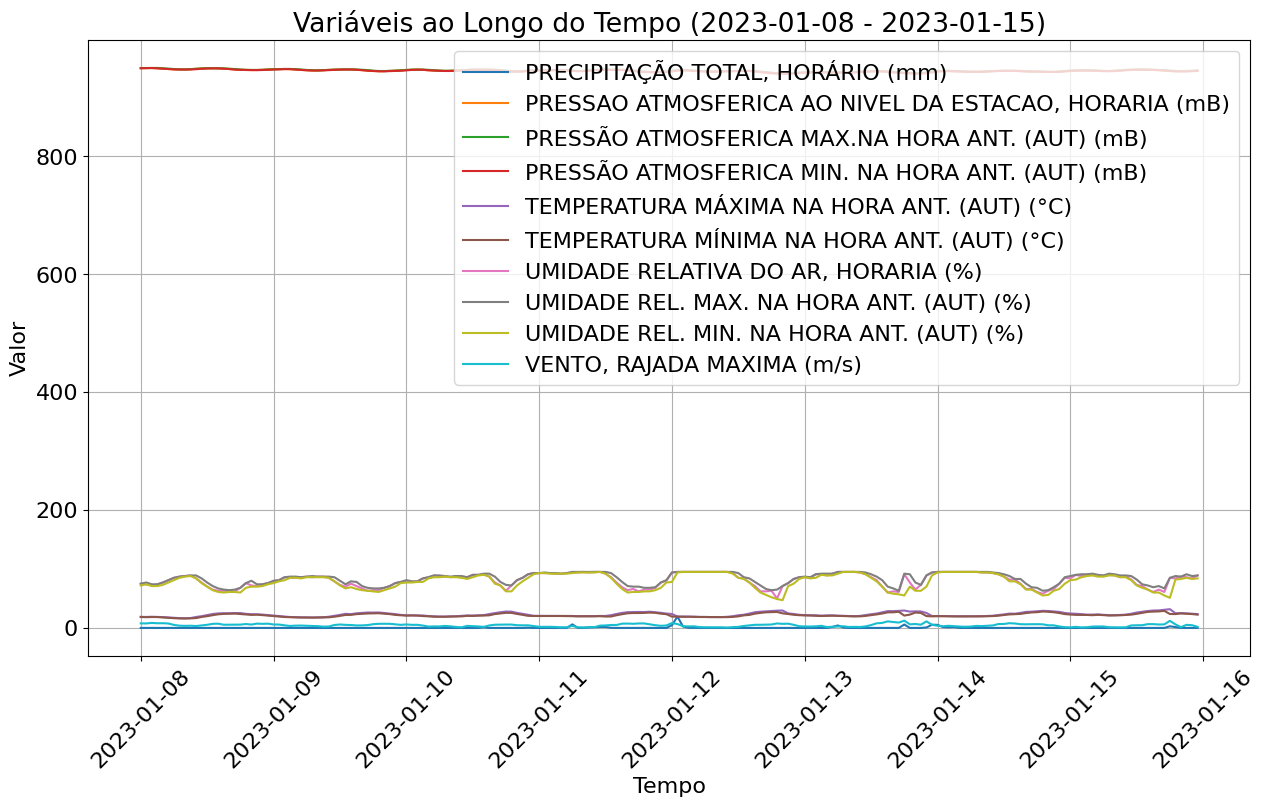

In [ ]:

colunas_para_converter = [
    'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
    'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
    'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
    'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
    'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)',
    'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
    'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
    'VENTO, RAJADA MAXIMA (m/s)',
]

start_date = '2023-01-08'
end_date = '2023-01-15'

# Filtrar os dados entre essas datas
df_semana = df2023.loc[start_date:end_date]


plt.figure(figsize=(15,8))  # Ajuste o tamanho do gráfico se necessário

# Plotar cada variável
for coluna in colunas_para_converter:
    plt.plot(df_semana.index, df_semana[coluna], label=coluna)

# Títulos e rótulos
plt.title('Variáveis ao Longo do Tempo (2023-01-08 - 2023-01-15)')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend(loc='upper right')  # Mostrar a legenda com os nomes das variáveis
plt.grid(True)  # Adicionar grade para facilitar a leitura
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor visualização
plt.show()


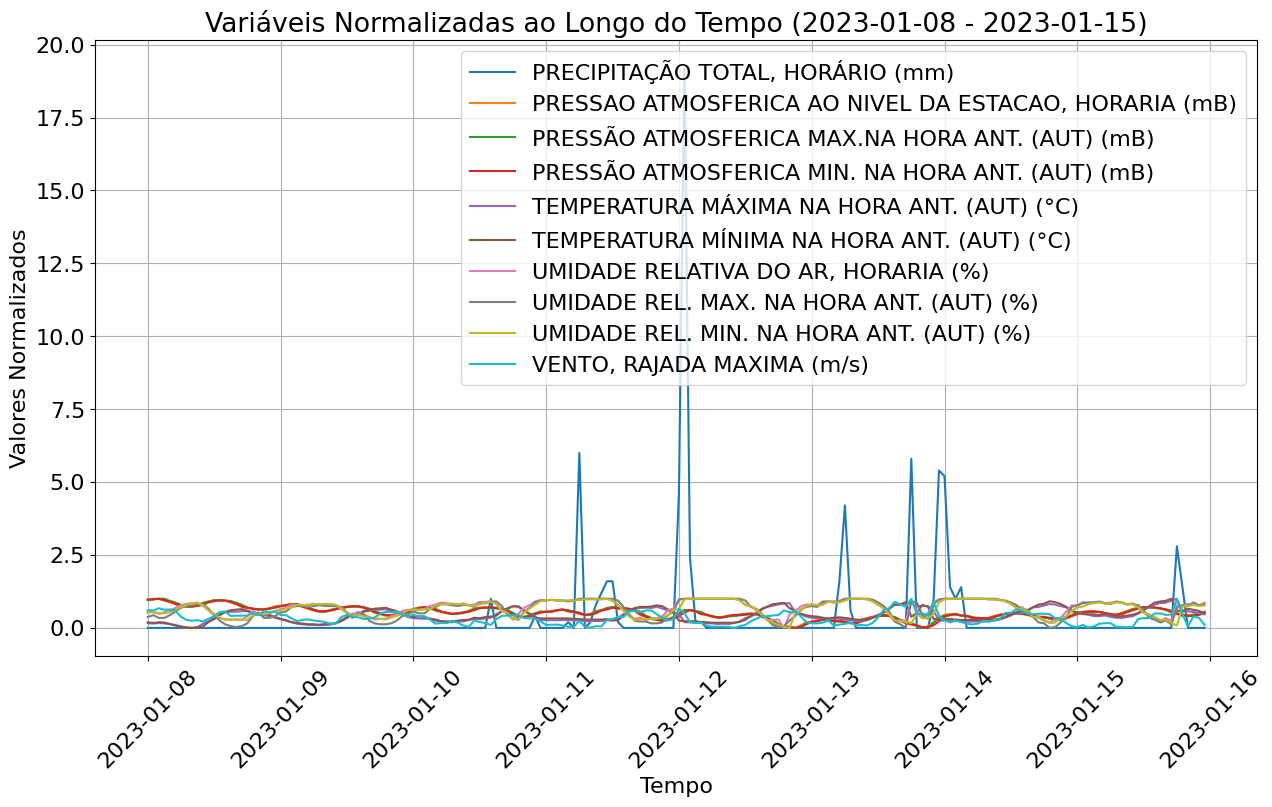

In [ ]:
# Normalizar as colunas de interesse (mínimo 0, máximo 1)
df_semana_normalizado = df_semana[colunas_para_converter].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Adicionar a precipitação original para comparar (normalizada ou não)
df_semana_normalizado['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] = df_semana['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']

# Plotar as variáveis normalizadas ao longo do tempo
plt.figure(figsize=(15,8))
for coluna in df_semana_normalizado.columns:
    plt.plot(df_semana.index, df_semana_normalizado[coluna], label=coluna)

plt.title('Variáveis Normalizadas ao Longo do Tempo (2023-01-08 - 2023-01-15)')
plt.xlabel('Tempo')
plt.ylabel('Valores Normalizados')
plt.legend(loc='upper right')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


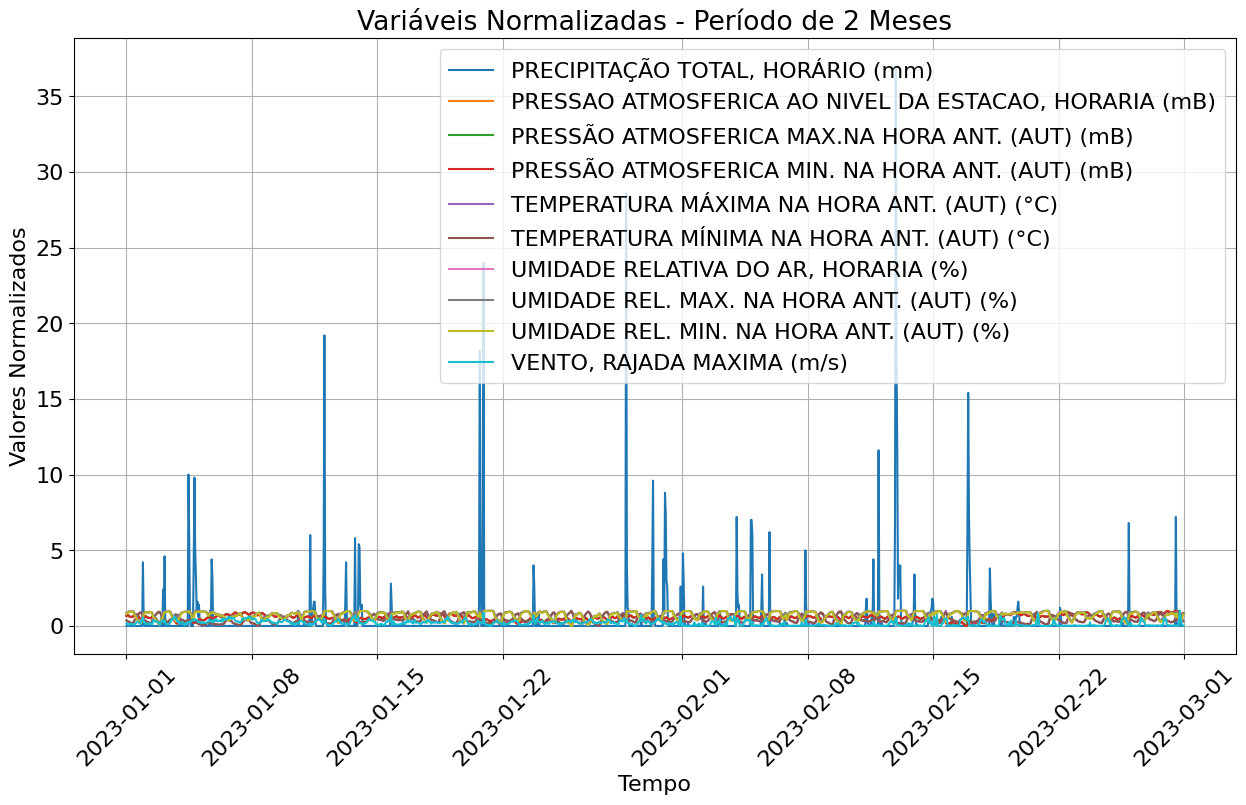

In [ ]:
# Definir intervalo de 2 meses
start_date_2m = '2023-01-01'
end_date_2m = '2023-02-28'

# Filtrar o DataFrame para os dois meses
df_2meses = df2023.loc[start_date_2m:end_date_2m]

# Normalizar as colunas de interesse
df_2meses_normalizado = df_2meses[colunas_para_converter].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Adicionar a precipitação original para comparar (normalizada ou não)
df_2meses_normalizado['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] = df_2meses['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']

# Plotar as variáveis normalizadas
plt.figure(figsize=(15,8))
for coluna in df_2meses_normalizado.columns:
    plt.plot(df_2meses.index, df_2meses_normalizado[coluna], label=coluna)

plt.title('Variáveis Normalizadas - Período de 2 Meses')
plt.xlabel('Tempo')
plt.ylabel('Valores Normalizados')
plt.legend(loc='upper right')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


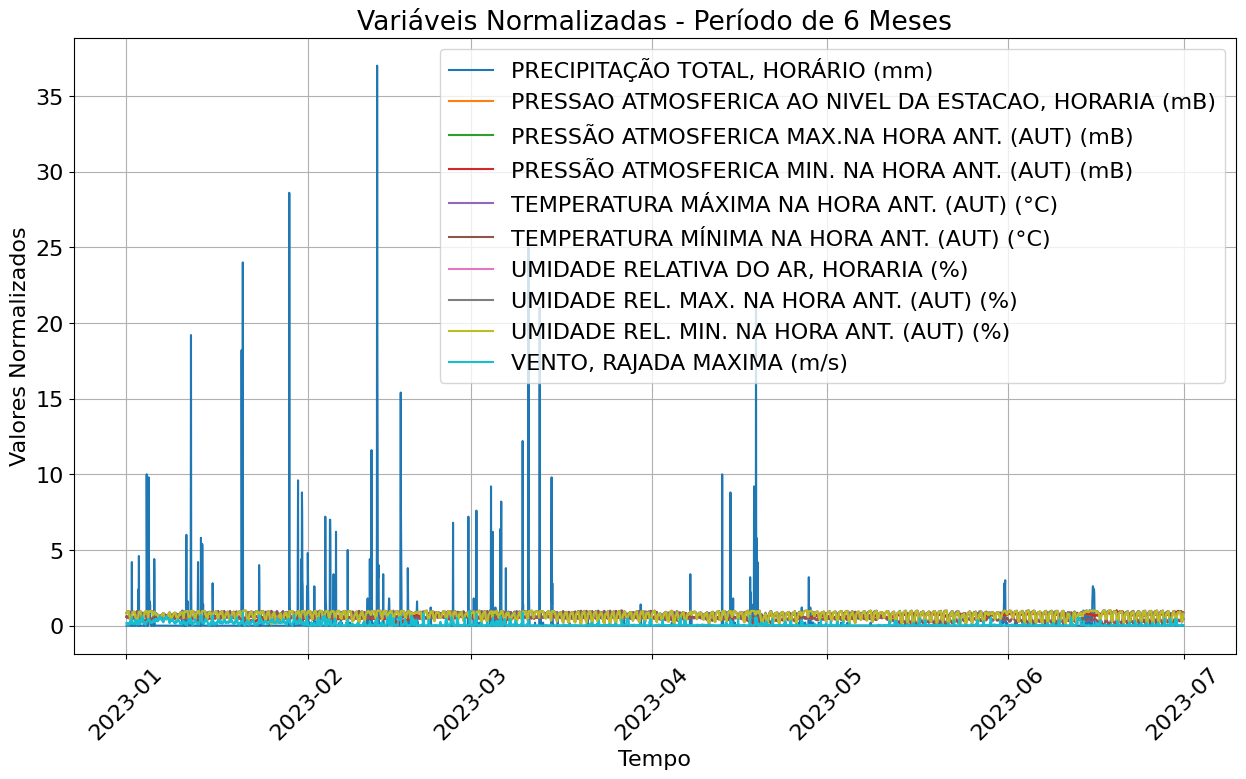

In [ ]:
# Definir intervalo de 6 meses
start_date_6m = '2023-01-01'
end_date_6m = '2023-06-30'

# Filtrar o DataFrame para os seis meses
df_6meses = df2023.loc[start_date_6m:end_date_6m]

# Normalizar as colunas de interesse
df_6meses_normalizado = df_6meses[colunas_para_converter].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Adicionar a precipitação original para comparar (normalizada ou não)
df_6meses_normalizado['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] = df_6meses['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']

# Plotar as variáveis normalizadas
plt.figure(figsize=(15,8))
for coluna in df_6meses_normalizado.columns:
    plt.plot(df_6meses.index, df_6meses_normalizado[coluna], label=coluna)

plt.title('Variáveis Normalizadas - Período de 6 Meses')
plt.xlabel('Tempo')
plt.ylabel('Valores Normalizados')
plt.legend(loc='upper right')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


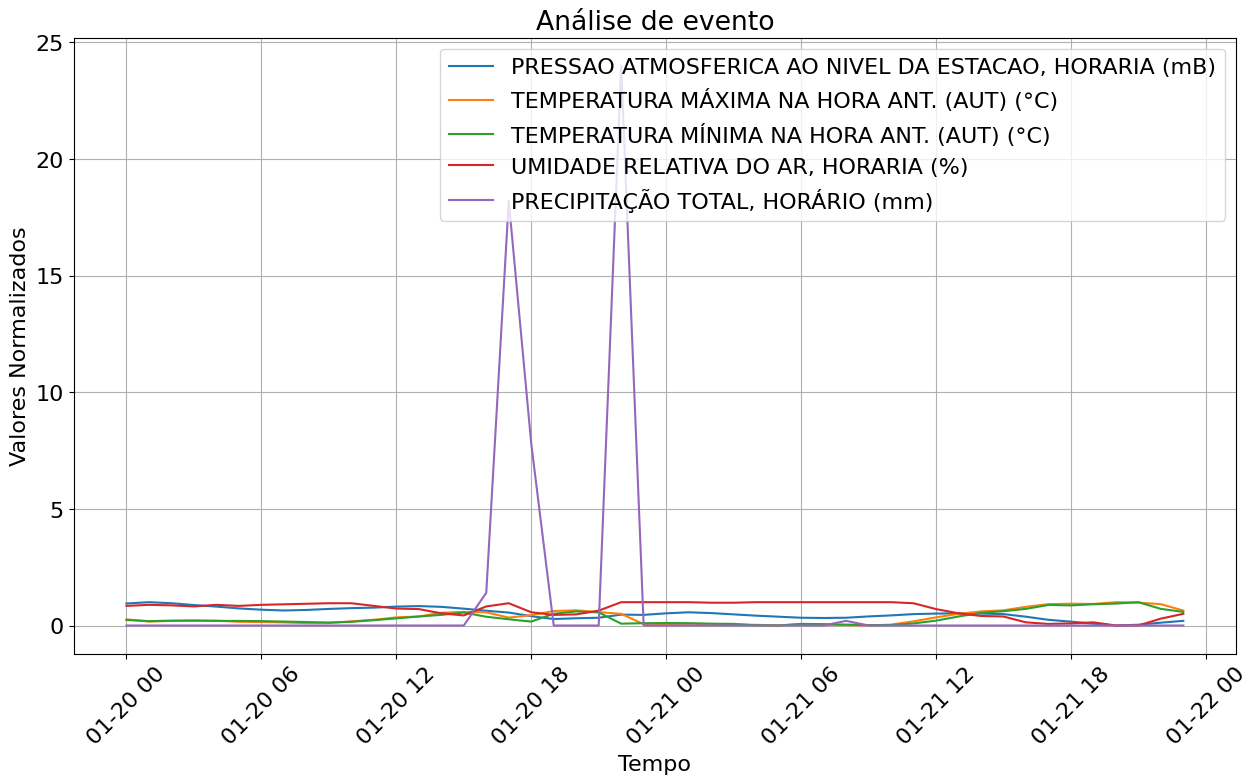

In [ ]:
# Evento
start_date_2m = '2023-01-20'
end_date_2m = '2023-01-21'

# Filtrar o DataFrame para os dois meses
df_2meses = df2023.loc[start_date_2m:end_date_2m]

# Selecionar as colunas de interesse: pressão, temperatura, umidade e precipitação
colunas_selecionadas = [
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
    'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
    'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)',
    'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'
]

# Normalizar as colunas selecionadas
df_2meses_normalizado_selecao = df_2meses[colunas_selecionadas].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Adicionar a precipitação original para comparar (normalizada ou não)
df_2meses_normalizado_selecao['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] = df_2meses['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']

# Definir o tamanho da fonte globalmente (opcional)
plt.rcParams.update({'font.size': 16})  # Isso aumenta o tamanho de todas as fontes

# Plotar as variáveis normalizadas selecionadas
plt.figure(figsize=(15,8))
for coluna in df_2meses_normalizado_selecao.columns:
    plt.plot(df_2meses.index, df_2meses_normalizado_selecao[coluna], label=coluna)

plt.title('Análise de evento')
plt.xlabel('Tempo')
plt.ylabel('Valores Normalizados')
plt.legend(loc='upper right')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


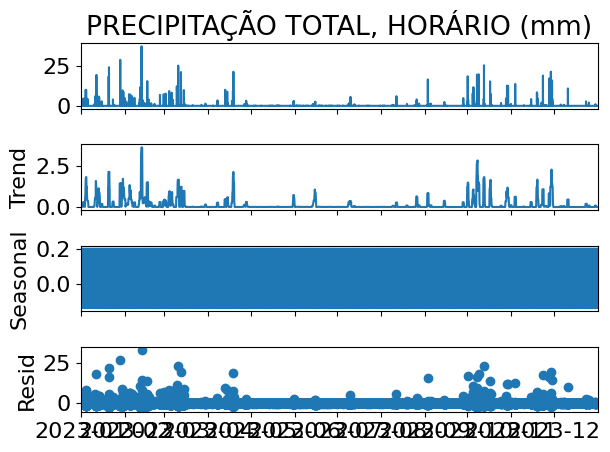

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

target_column = 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'

df2023[target_column] = df2023[target_column].fillna(df2023[target_column].mean())

result = seasonal_decompose(df2023[target_column], model='additive', period=24)

result.plot()
plt.show()

In [ ]:

# Escolher apenas as colunas numéricas relevantes
colunas_selecionadas = [
    'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
    'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
    'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)'
]

# Filtrar e normalizar os dados
data = df2023[colunas_selecionadas].dropna()
data_normalizada = (data - data.min()) / (data.max() - data.min())  # Normalização entre 0 e 1

# Converter para arrays numpy
data_array = data_normalizada.values


In [ ]:
def criar_sequencias(data, passos_tempo):
    X, y = [], []
    for i in range(len(data) - passos_tempo):
        X.append(data[i:(i + passos_tempo)])
        y.append(data[i + passos_tempo])
    return np.array(X), np.array(y)

passos_tempo = 24  # Por exemplo, usar 24 horas para prever a próxima hora
X, y = criar_sequencias(data_array, passos_tempo)

# Dividir em conjuntos de treinamento e teste
tamanho_treinamento = int(len(X) * 0.8)
X_treino, X_teste = X[:tamanho_treinamento], X[tamanho_treinamento:]
y_treino, y_teste = y[:tamanho_treinamento], y[tamanho_treinamento:]


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization

# Criar o modelo LSTM
modelo_lstm = Sequential()
modelo_lstm.add(LSTM(100, return_sequences=True, input_shape=(X_treino.shape[1], X_treino.shape[2])))
modelo_lstm.add(Dropout(0.3))
modelo_lstm.add(BatchNormalization())  # Normalização em lote
modelo_lstm.add(LSTM(50))
modelo_lstm.add(Dropout(0.3))
modelo_lstm.add(Dense(20, activation='relu'))  # Camada densa com ativação ReLU
modelo_lstm.add(Dense(y_treino.shape[1]))  # Saídas

modelo_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo
modelo_lstm.fit(X_treino, y_treino, epochs=50, batch_size=32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - loss: 0.0515
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0101
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0069
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.0053
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0042
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0038
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - loss: 0.0034
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0032
Epoch 9/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 0.0031
Epoch 10/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - loss: 0.0028
Epoch 11/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0031
Epoch 12/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 0.0026
Epoch 13/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - loss: 0.0026
Epoch 14/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - loss: 0.0027
Epoch 15/50
219/219 ━━━━━━━━━━━━━━━━━━

In [ ]:
from keras.layers import GRU

# Criar o modelo GRU
modelo_gru = Sequential()
modelo_gru.add(LSTM(100, return_sequences=True, input_shape=(X_treino.shape[1], X_treino.shape[2])))
modelo_gru.add(Dropout(0.3))
modelo_gru.add(BatchNormalization())  # Normalização em lote
modelo_gru.add(LSTM(50))
modelo_gru.add(Dropout(0.3))
modelo_gru.add(Dense(20, activation='relu'))  # Camada densa com ativação ReLU
modelo_gru.add(Dense(y_treino.shape[1]))  # Saídas

modelo_gru.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo
modelo_gru.fit(X_treino, y_treino, epochs=50, batch_size=32)


Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - loss: 0.0624
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0111
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - loss: 0.0075
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0058
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - loss: 0.0047
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - loss: 0.0041
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0034
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0033
Epoch 9/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0031
Epoch 10/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0030
Epoch 11/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - loss: 0.0029
Epoch 12/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - loss: 0.0028
Epoch 13/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - loss: 0.0026
Epoch 14/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - loss: 0.0027
Epoch 15/50
219/219 ━━━━━━━━━━━━━━━━━━

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


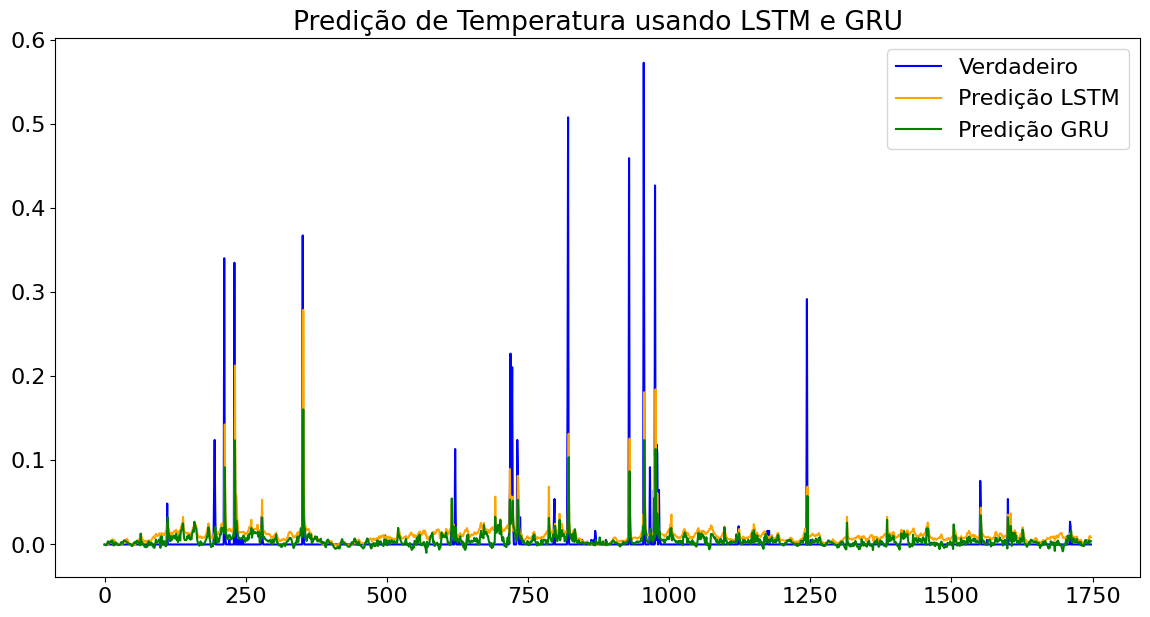

In [ ]:
# Previsões com o modelo LSTM
y_pred_lstm = modelo_lstm.predict(X_teste)

# Previsões com o modelo GRU
y_pred_gru = modelo_gru.predict(X_teste)

y_teste = y_teste[:, 0]
y_pred_lstm = y_pred_lstm[:, 0]
y_pred_gru = y_pred_gru[:, 0]

# Visualizar as predições
plt.figure(figsize=(14, 7))
plt.plot(y_teste, label='Verdadeiro', color='blue')
plt.plot(y_pred_lstm, label='Predição LSTM', color='orange')
plt.plot(y_pred_gru, label='Predição GRU', color='green')
plt.title('Predição de Temperatura usando LSTM e GRU')
plt.legend()
plt.show()


In [ ]:
# Specify the 'latin-1' encoding when reading the CSV file
df2023 = pd.read_csv("/content/2023.CSV", sep=';', skiprows=8, encoding='latin-1', usecols=range(19) )

df2023 = df2023.drop(['RADIACAO GLOBAL (Kj/m²)', 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)', 'TEMPERATURA DO PONTO DE ORVALHO (°C)', 'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)','TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)', 'VENTO, DIREÇÃO HORARIA (gr) (° (gr))', 'VENTO, VELOCIDADE HORARIA (m/s)'], axis=1)

# Remover o ' UTC' da coluna 'Hora UTC'
df2023['Hora UTC'] = df2023['Hora UTC'].str.replace(' UTC', '')

# Combinar Data e Hora e converter para datetime com o formato correto
df2023['datetime'] = pd.to_datetime(df2023['Data'] + ' ' + df2023['Hora UTC'], format='%Y/%m/%d %H%M')

# Agora você pode definir essa coluna como o índice, se desejar
df2023.set_index('datetime', inplace=True)

df2023.drop(['Data', 'Hora UTC'], axis=1, inplace=True)

df2023

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, RAJADA MAXIMA (m/s)"
datetime,,,,,,,,,,
2023-01-01 00:00:00,0,"946,8","946,8","946,1","22,1","21,4",88,83,88,"3,1"
2023-01-01 01:00:00,0,"947,2","947,3","946,8","21,4","20,5",90,88,90,"2,9"
2023-01-01 02:00:00,0,"946,9","947,4","946,9","20,9","20,4",91,89,90,"1,7"
2023-01-01 03:00:00,0,"946,3",947,"946,3","21,1","19,8",93,88,93,",8"
2023-01-01 04:00:00,0,"945,5","946,3","945,5",20,"19,6",94,92,92,"1,9"
...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,0,"943,9","944,3","943,9","29,4","27,4",55,45,54,10
2023-12-31 20:00:00,0,"944,1","944,1","943,9","27,5","26,2",57,53,57,"8,8"
2023-12-31 21:00:00,0,"944,4","944,4","944,1","26,6","24,6",62,56,62,"9,1"


In [ ]:
print(df2023.index)

DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 01:00:00',
               '2023-01-01 02:00:00', '2023-01-01 03:00:00',
               '2023-01-01 04:00:00', '2023-01-01 05:00:00',
               '2023-01-01 06:00:00', '2023-01-01 07:00:00',
               '2023-01-01 08:00:00', '2023-01-01 09:00:00',
               ...
               '2023-12-31 14:00:00', '2023-12-31 15:00:00',
               '2023-12-31 16:00:00', '2023-12-31 17:00:00',
               '2023-12-31 18:00:00', '2023-12-31 19:00:00',
               '2023-12-31 20:00:00', '2023-12-31 21:00:00',
               '2023-12-31 22:00:00', '2023-12-31 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=8760, freq=None)


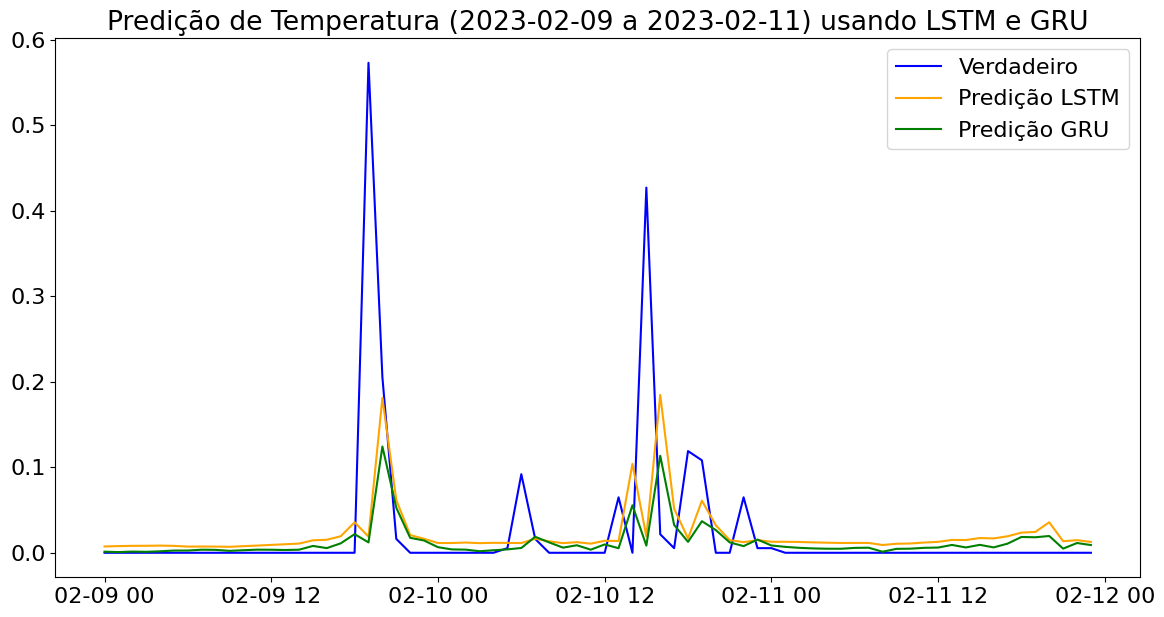

In [ ]:
# Exemplo de DataFrame para armazenar as previsões junto com a coluna datetime
df = pd.DataFrame({
    'datetime': df2023.index[:len(y_teste)],  # Aqui vai a sua coluna de datas
    'y_teste': y_teste,
    'y_pred_lstm': y_pred_lstm,
    'y_pred_gru': y_pred_gru
})

# Garantir que 'datetime' seja de tipo datetime
df['datetime'] = pd.to_datetime(df['datetime'])

# Definir 'datetime' como índice para facilitar a seleção
df.set_index('datetime', inplace=True)

# Ajustar para um intervalo que realmente tenha dados
inicio = '2023-02-09'
fim = '2023-02-11'  # Ou outra data dentro do intervalo disponível

# Selecionar o intervalo de datas correto
df_recortado = df.loc[inicio:fim]


# Visualizar as predições para o intervalo específico
plt.figure(figsize=(14, 7))
plt.plot(df_recortado.index, df_recortado['y_teste'], label='Verdadeiro', color='blue')
plt.plot(df_recortado.index, df_recortado['y_pred_lstm'], label='Predição LSTM', color='orange')
plt.plot(df_recortado.index, df_recortado['y_pred_gru'], label='Predição GRU', color='green')
plt.title(f'Predição de Temperatura ({inicio} a {fim}) usando LSTM e GRU')
plt.legend()
plt.show()



In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calcular MSE, RMSE e MAE para LSTM
mse_lstm = mean_squared_error(df_recortado['y_teste'], df_recortado['y_pred_lstm'])
rmse_lstm = np.sqrt(mse_lstm)
mae_lstm = mean_absolute_error(df_recortado['y_teste'], df_recortado['y_pred_lstm'])
r2_lstm = r2_score(df_recortado['y_teste'], df_recortado['y_pred_lstm'])

# Calcular MSE, RMSE e MAE para GRU
mse_gru = mean_squared_error(df_recortado['y_teste'], df_recortado['y_pred_gru'])
rmse_gru = np.sqrt(mse_gru)
mae_gru = mean_absolute_error(df_recortado['y_teste'], df_recortado['y_pred_gru'])
r2_gru = r2_score(df_recortado['y_teste'], df_recortado['y_pred_gru'])

# Exibir os resultados
print(f'Métricas para LSTM:\nMSE: {mse_lstm}\nRMSE: {rmse_lstm}\nMAE: {mae_lstm}\nR²: {r2_lstm}')
print(f'\nMétricas para GRU:\nMSE: {mse_gru}\nRMSE: {rmse_gru}\nMAE: {mae_gru}\nR²: {r2_gru}')


Métricas para LSTM:
MSE: 0.0076781816347073545
RMSE: 0.08762523400657686
MAE: 0.034163414836475246
R²: 0.004063769691117214

Métricas para GRU:
MSE: 0.00757356732290072
RMSE: 0.0870262450235601
MAE: 0.02871320362618143
R²: 0.017633282408307305


In [ ]:
pip install statsmodels


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
<ipython-input-40-bc30940453fc>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recortado['y_pred_sarima'] = sarima_fit.predict(start=df_recortado.index[0], end=df_recortado.index[-1])


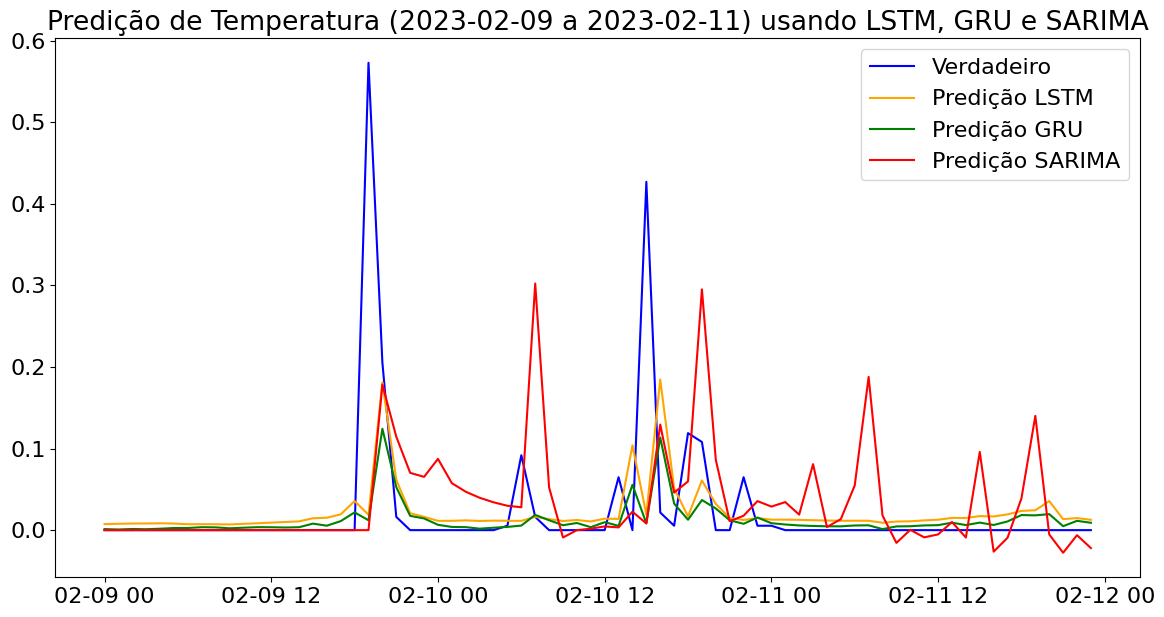

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Definindo o intervalo de datas
inicio = '2023-02-09'
fim = '2023-02-11'

# Supondo que df já está definido e contém 'y_teste' e que seu índice está em datetime
df_recortado = df.loc[inicio:fim]

# Ajustar o modelo SARIMA
# Defina os parâmetros (p, d, q) e (P, D, Q, S) conforme necessário
model = SARIMAX(df_recortado['y_teste'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = model.fit(disp=False)

# Fazer previsões
df_recortado['y_pred_sarima'] = sarima_fit.predict(start=df_recortado.index[0], end=df_recortado.index[-1])

# Visualizar as predições
plt.figure(figsize=(14, 7))
plt.plot(df_recortado.index, df_recortado['y_teste'], label='Verdadeiro', color='blue')
plt.plot(df_recortado.index, df_recortado['y_pred_lstm'], label='Predição LSTM', color='orange')
plt.plot(df_recortado.index, df_recortado['y_pred_gru'], label='Predição GRU', color='green')
plt.plot(df_recortado.index, df_recortado['y_pred_sarima'], label='Predição SARIMA', color='red')
plt.title(f'Predição de Temperatura ({inicio} a {fim}) usando LSTM, GRU e SARIMA')
plt.legend()
plt.show()


In [ ]:
# Calcular MSE, RMSE e MAE para SARIMA
mse_sarima = mean_squared_error(df_recortado['y_teste'], df_recortado['y_pred_sarima'])
rmse_sarima = np.sqrt(mse_sarima)
mae_sarima = mean_absolute_error(df_recortado['y_teste'], df_recortado['y_pred_sarima'])
r2_sarima = r2_score(df_recortado['y_teste'], df_recortado['y_pred_sarima'])

# Exibir os resultados
print(f'Métricas para SARIMA:\nMSE: {mse_sarima}\nRMSE: {rmse_sarima}\nMAE: {mae_sarima}\nR²: {r2_sarima}')


Métricas para SARIMA:
MSE: 0.010775006452156836
RMSE: 0.10380272853907471
MAE: 0.04820522240089574
R²: -0.39762509120741574
